### Levantamentos de informações diversas sobre os dados:
1. Dimensões, informações de tipo de dados, etc...
2. Geração de Gráficos Diversos;
3. Considerações sobre dados faltantes;
4. Remoção de características com dados faltantes abaixo de limiar pré-estabelecido
5. Featuring Engineering - Encode, Impute, Remoção de Características Esparsas, etc...
6. Geração de Relatórios (EDA) automatizados;

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns


In [2]:
# customizações de algumas variáveis de ambiente:
%matplotlib inline
sns.set_style("darkgrid")



In [29]:
# sobre a distribuição dos dados:
isolados = pd.read_csv('data/03 - reacoes_detalhes.csv')
isolados.head(3)


,id,ccr_codigo,amostra,substrato,cidade,uf,1,2,3,4,...,52,53,64,65,66,67,68,69,78,79
0,2,UFT.2015(L)8501,JHF.BU.001.002,Fruto de Buriti,Nova Xavantina,MT,NaN,+,+,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,UFT.2015(L)8503,JHF.BU.003.001,Fruto de Buriti,Nova Xavantina,MT,NaN,+,+,+w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,UFT.2015(L)8505,JHF.BU.003.003,Fruto de Buriti,Nova Xavantina,MT,NaN,-+,+,-+,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


([0, 1, 2, 3, 4],
 [Text(0, 0, 'Nova Xavantina'),
  Text(1, 0, 'Pium'),
  Text(2, 0, 'Taguatinga'),
  Text(3, 0, 'Palmas'),
  Text(4, 0, 'Natividade')])

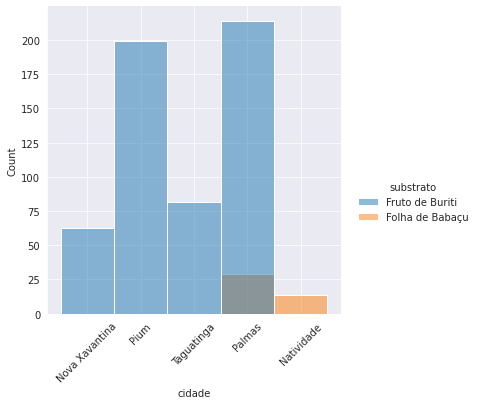

In [30]:
sns.displot(isolados, x="cidade", hue="substrato", binwidth=3)
plt.xticks(rotation=45)


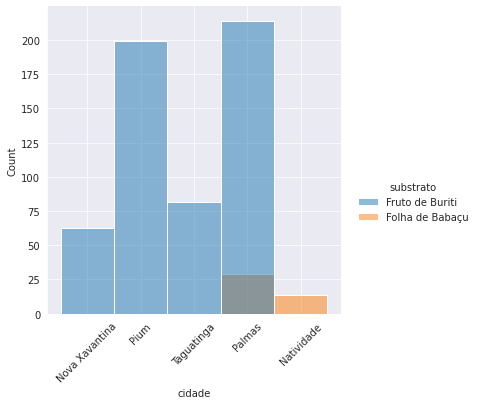

In [31]:
fig = sns.displot(isolados, x="cidade", hue="substrato", binwidth=3,)
# plt.xticks(rotation=315)
plt.xticks(rotation=45)
fig.savefig('substrato_cidade.png', dpi=300)


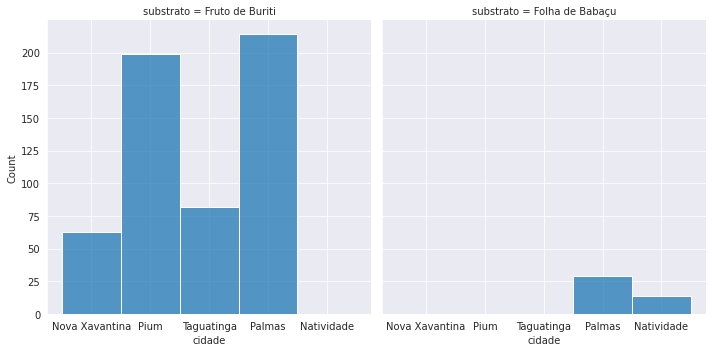

In [32]:
sns.displot(isolados, x="cidade", col="substrato", binwidth=3)


In [34]:
df = pd.read_csv('data/02 - reacoes.csv', index_col='id')
df.head(3)


,ccr,1,2,3,4,5,6,7,8,9,...,52,53,64,65,66,67,68,69,78,79
id,,,,,,,,,,,,,,,,,,,,,
2,UFT.2015(L)8501,NaN,+,+,-,-,+,+,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UFT.2015(L)8503,NaN,+,+,+w,+,+,-+,-,+w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UFT.2015(L)8505,NaN,-+,+,-+,-+,-,+,-+,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Análise Exploratória de Dados:
1. Informações Gerais
2. Tratamento de valores Nulos
3. Relatórios e outros

Questions to answer:
* How many features do you have?
* How many observations do you have?
* What is the data type of each feature?

In [5]:
# dimensoes - linhas e colunas
df.shape

# informações diversas:
# df.info()

(601, 58)

In [6]:
# descricao dos dados sob analise:
df.describe(include='object')

,ccr,1,2,3,4,5,6,7,8,9,...,52,53,64,65,66,67,68,69,78,79
count,601,26,600,601,601,579,600,601,598,595,...,312,308,227,312,303,242,242,199,234,226
unique,601,4,7,6,5,5,6,5,4,6,...,2,2,2,2,2,2,3,3,2,2
top,UFT.2015(L)8501,+,+,+,+,+,+,+,-,-,...,+,-,-,-,-,-,-,+,-,-
freq,1,10,415,404,391,404,458,385,543,375,...,301,208,218,217,225,130,132,176,140,162


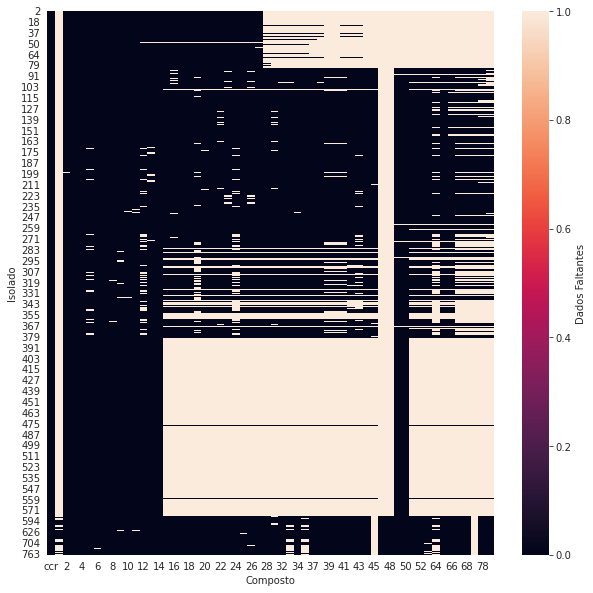

In [47]:
# mostra valores faltantes dentro de uma amostra dos dados:
# salva grafico na raiz do diretório
fig, ax = plt.subplots(figsize=(10,10))  
mapa_calor = sns.heatmap(df.isnull(),
            cbar_kws={'label': 'Dados Faltantes'}, vmin=0, vmax=1)
ax.set(xlabel='Composto', ylabel='Isolado')

fig = mapa_calor.get_figure()
fig.savefig('valores_faltantes.png', dpi=300)

plt.show()


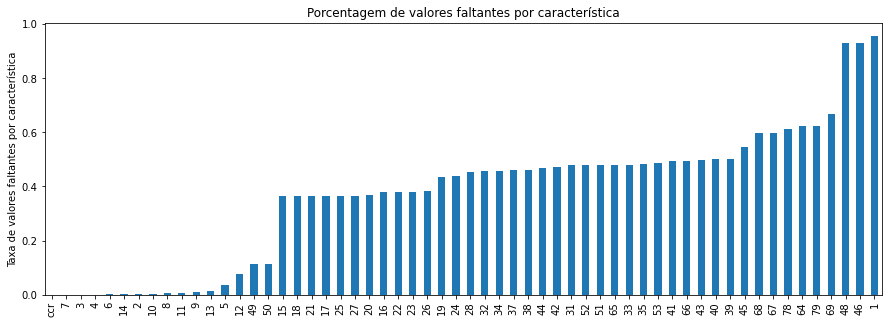

In [35]:
df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 5),
    title="Porcentagem de valores faltantes por característica",
    ylabel="Taxa de valores faltantes por característica");


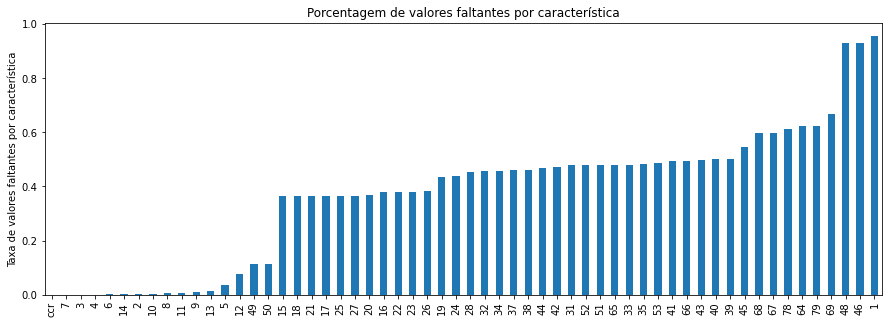

In [38]:
# salva o grafico anterior no diretório raiz:
heat_plot = df.isna().mean().sort_values().plot(
    kind="bar", figsize=(15, 5),
    title="Porcentagem de valores faltantes por característica",
    ylabel="Taxa de valores faltantes por característica");
fig = heat_plot.get_figure()
fig.savefig('missing_values.png', dpi=300)


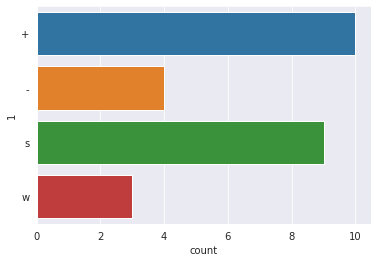

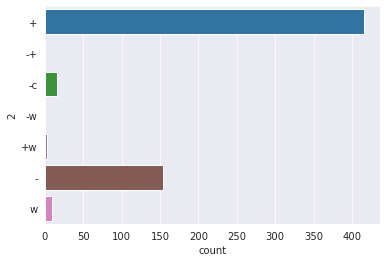

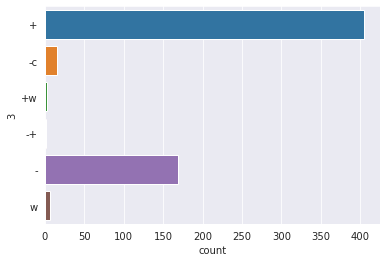

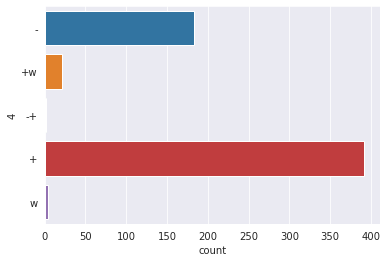

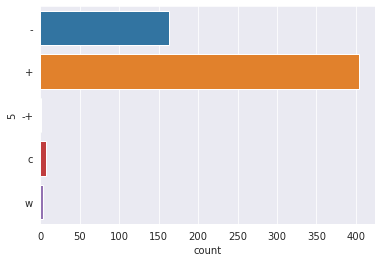

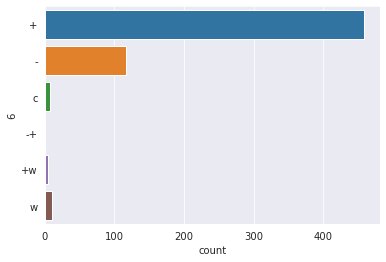

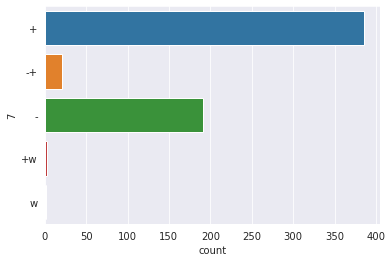

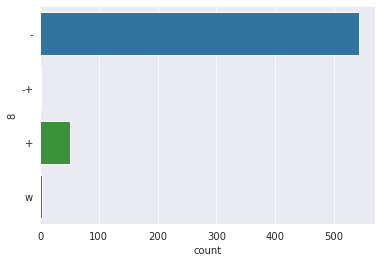

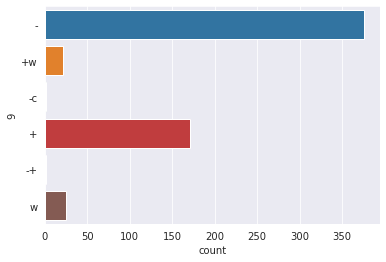

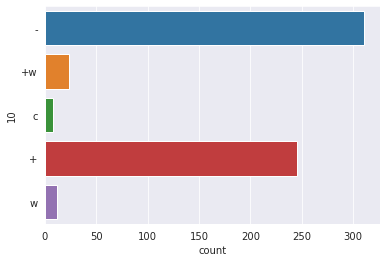

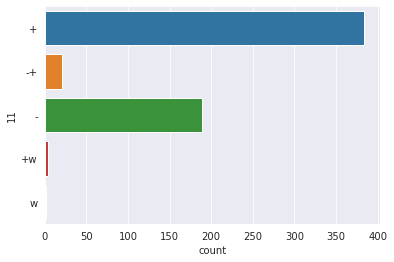

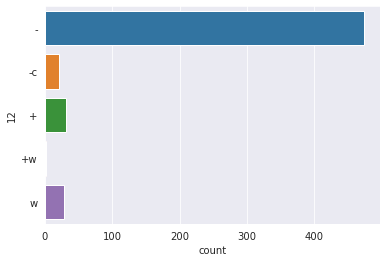

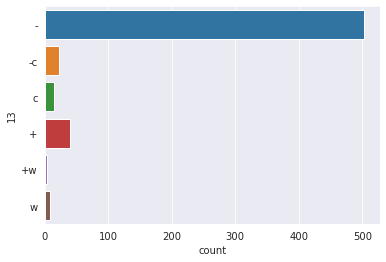

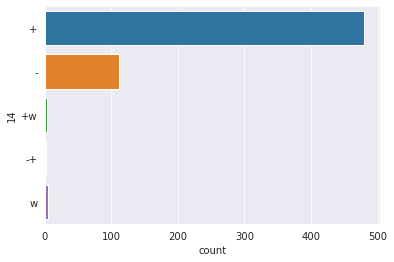

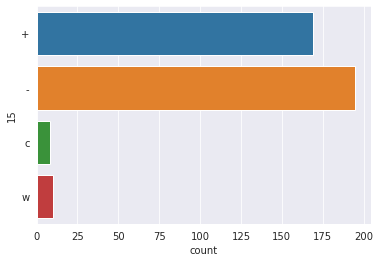

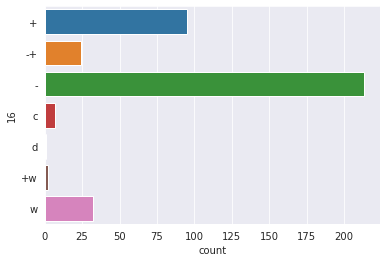

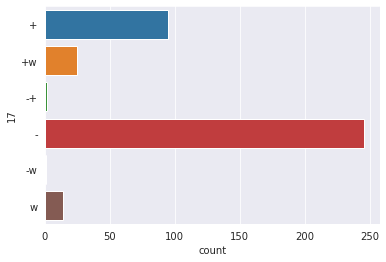

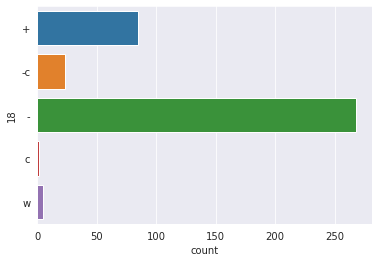

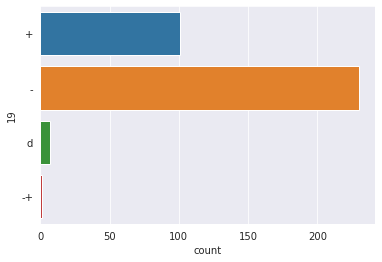

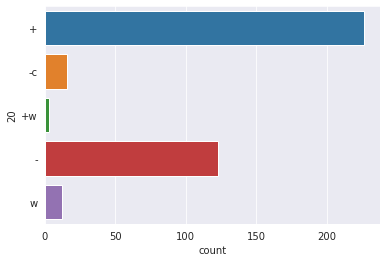

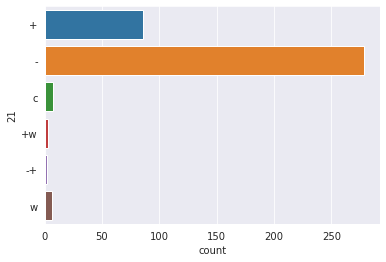

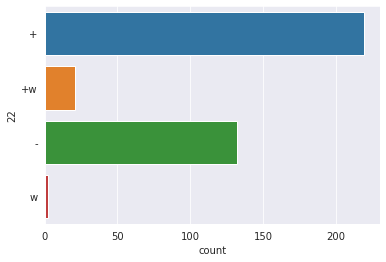

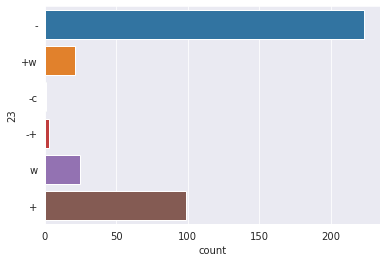

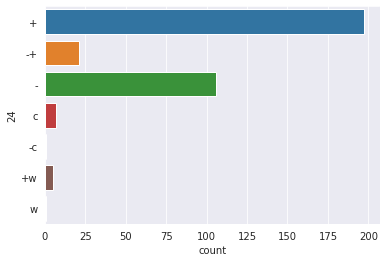

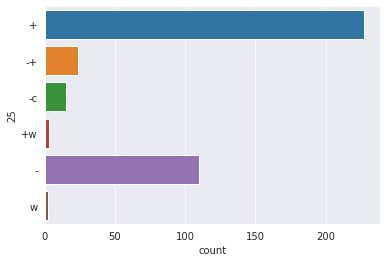

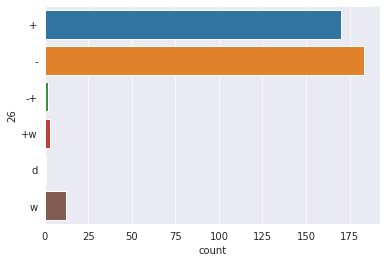

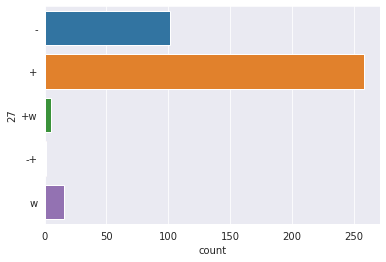

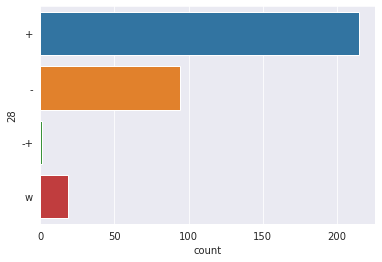

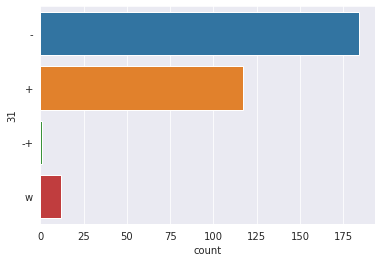

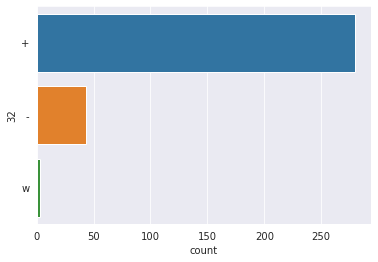

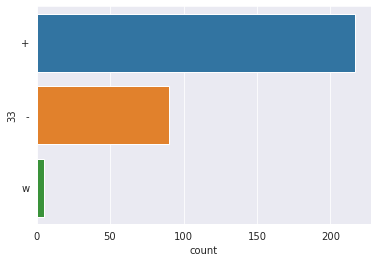

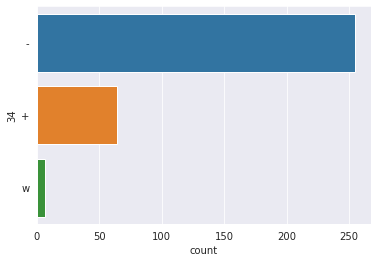

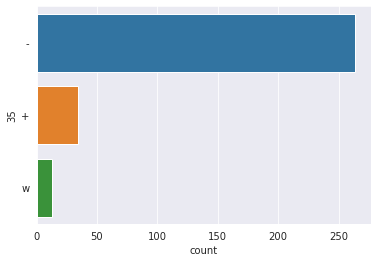

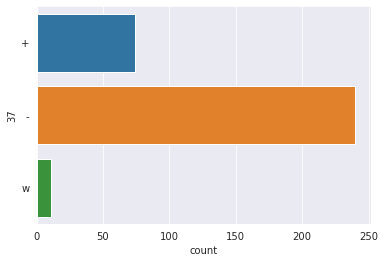

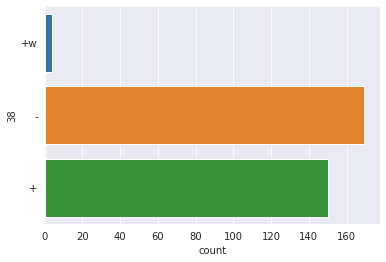

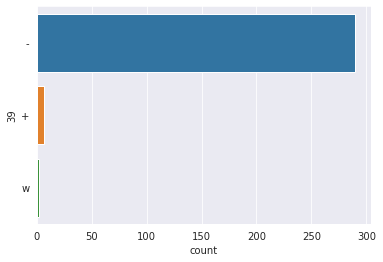

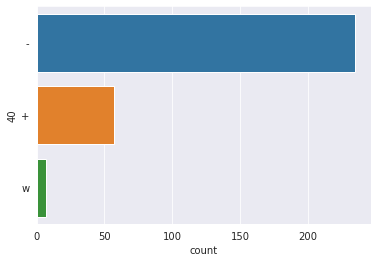

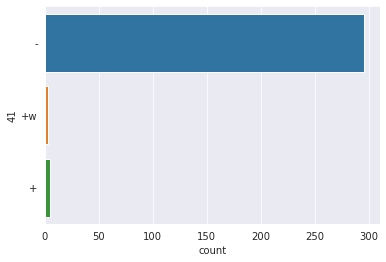

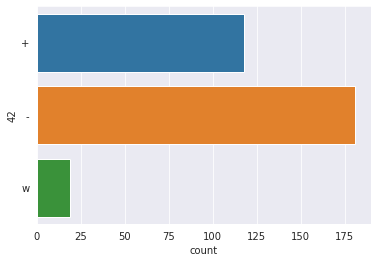

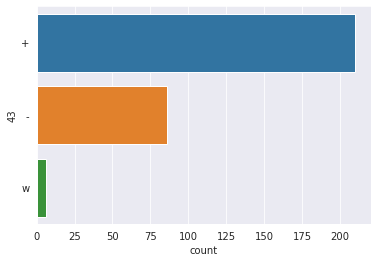

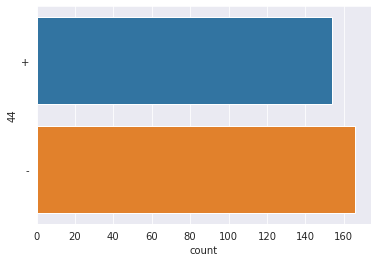

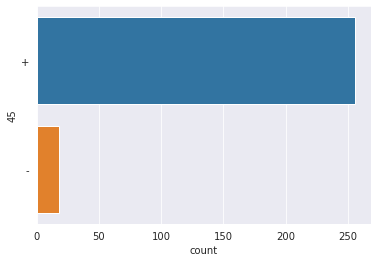

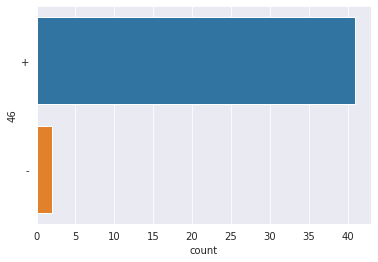

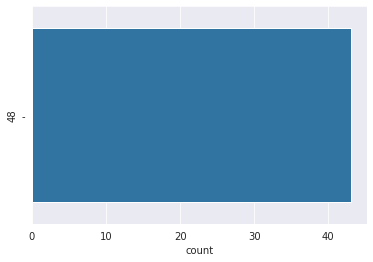

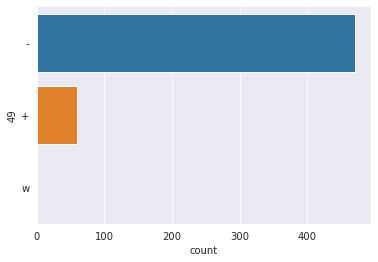

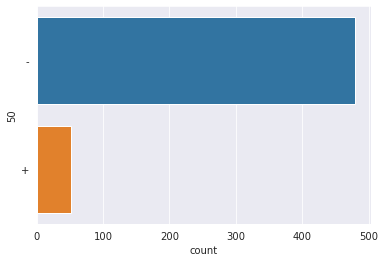

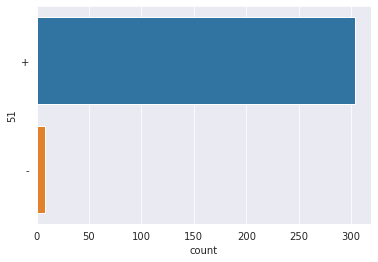

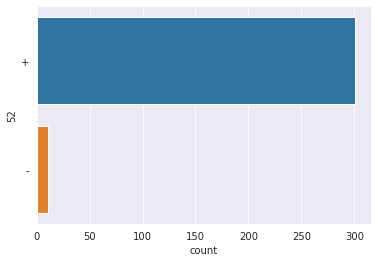

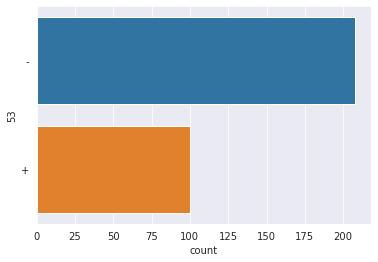

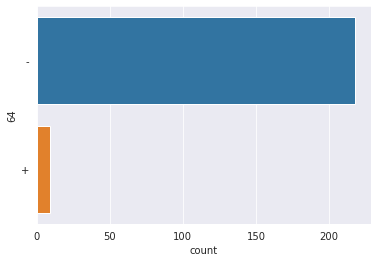

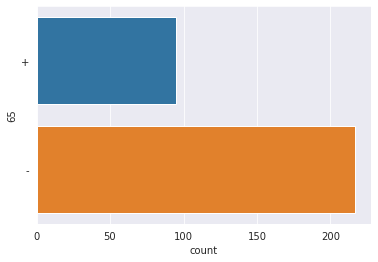

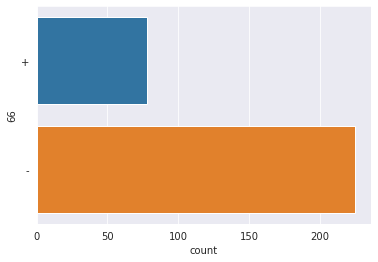

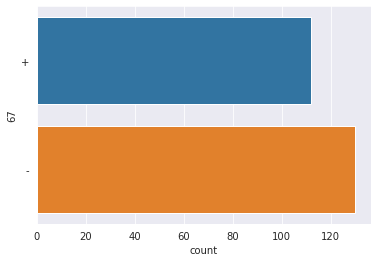

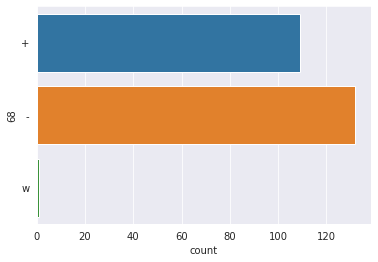

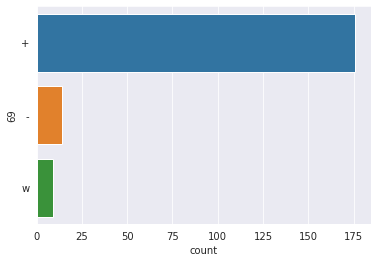

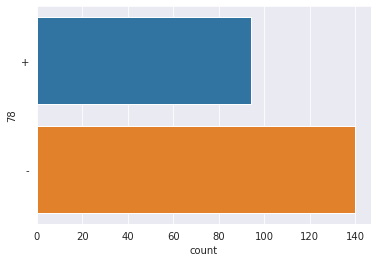

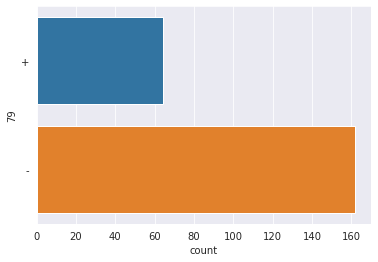

In [48]:
# plota cada característica categorica:
for column in df.select_dtypes(include='object'):
    if df[column].nunique() < 10:
        sns.countplot(y=column, data=df)
        plt.show()


### Observações sobre a presença de valores faltantes:

Are there so many missing values for a variable that you should drop that variable from your dataset?


In [9]:
# mostra colunas com qtd de valores nulos maior que 50% dos possiveis registros: 
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 50]


,Total,Missing Percent
1,575,95.673877
46,558,92.845258
48,558,92.845258
69,402,66.888519
79,375,62.396007
64,374,62.229617
78,367,61.064892
67,359,59.733777
68,359,59.733777
45,327,54.409318


In [10]:
# mostra dados faltantes em números:
df.isnull().sum()

ccr      0
1      575
2        1
3        0
4        0
5       22
6        1
7        0
8        3
9        6
10       2
11       3
12      45
13       9
14       1
15     219
16     227
17     219
18     219
19     262
20     221
21     219
22     227
23     229
24     263
25     220
26     230
27     220
28     272
31     287
32     275
33     289
34     275
35     290
37     276
38     278
39     302
40     302
41     298
42     283
43     299
44     281
45     327
46     558
48     558
49      69
50      69
51     289
52     289
53     293
64     374
65     289
66     298
67     359
68     359
69     402
78     367
79     375
dtype: int64

In [ ]:
# remove quaisquer colunas com mais de 15% de valores faltantes:
# df = df.dropna(thresh=df.shape[0] * 0.85, axis=1)

# remove quaisquer colunas com mais de 50% de valores faltantes:
df = df.dropna(thresh=df.shape[0] * 0.5, axis=1)
df.shape



In [13]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 601 entries, 2 to 763
Data columns (total 58 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ccr     601 non-null    object
 1   1       26 non-null     object
 2   2       600 non-null    object
 3   3       601 non-null    object
 4   4       601 non-null    object
 5   5       579 non-null    object
 6   6       600 non-null    object
 7   7       601 non-null    object
 8   8       598 non-null    object
 9   9       595 non-null    object
 10  10      599 non-null    object
 11  11      598 non-null    object
 12  12      556 non-null    object
 13  13      592 non-null    object
 14  14      600 non-null    object
 15  15      382 non-null    object
 16  16      374 non-null    object
 17  17      382 non-null    object
 18  18      382 non-null    object
 19  19      339 non-null    object
 20  20      380 non-null    object
 21  21      382 non-null    object
 22  22      374 non-null    ob

In [14]:
df.shape


(601, 58)

In [28]:
#df.describe(include = 'all') # so funciona para valores numericos
df.describe(include = 'all')


,ccr,1,2,3,4,5,6,7,8,9,...,52,53,64,65,66,67,68,69,78,79
count,601,26,600,601,601,579,600,601,598,595,...,312,308,227,312,303,242,242,199,234,226
unique,601,4,7,6,5,5,6,5,4,6,...,2,2,2,2,2,2,3,3,2,2
top,UFT.2015(L)8501,+,+,+,+,+,+,+,-,-,...,+,-,-,-,-,-,-,+,-,-
freq,1,10,415,404,391,404,458,385,543,375,...,301,208,218,217,225,130,132,176,140,162


In [29]:
# checa existência de objetos duplicados:
df.duplicated().sum()


0

In [ ]:
# remove elementos duplicados (de uma copia do dataframe) -- caso fosse necessario, claro.
# df1 = df.copy()
# df1.drop_duplicates(inplace=True)


Remoção das características que não atingiram limiar (treshold) preestabelecido:

In [51]:
# copia de segurança
df1 = df.copy()


In [53]:
# remove colunas (axis=1) que não possuam ao menos 303 celulas preenchidas
# 303 celulas preenchidas é equivalente a ter mais de 50% de preenchimento dos dados
df1.dropna(axis=1, thresh=303, inplace=True)

# outra forma de fazer, dessa vez atribuindo uma porcentagem ao treshold
# pct_null = df.isnull().sum() / len(df)
# missing_features = pct_null[pct_null > 0.80].index

df1.head(3)


,ccr,2,3,4,5,6,7,8,9,10,...,41,42,44,49,50,51,52,53,65,66
id,,,,,,,,,,,,,,,,,,,,,
2,UFT.2015(L)8501,+,+,-,-,+,+,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UFT.2015(L)8503,+,+,+w,+,+,-+,-,+w,+w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UFT.2015(L)8505,-+,+,-+,-+,-,+,-+,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [54]:
# visto que aquelas 12 colunas foram removidas
df1.shape

(601, 45)

In [55]:
# checa novamente por objetos duplicados
df1.duplicated().sum()


0

Verificar colunas com baixa cardinalidade (com cardinalidade igual a 1). Colunas cujos valores não possuem variação não contribuem para algoritmo de agrupamento; 


Apenas uma coluna apresenta cardinalidade == 1. Coluna correspondente ao composto 48. 
Já removido na operação anterior por apresentar 92% dos dados faltantes.


In [56]:
# salva estado atual do dataframe1 em arquivo CSV:
df1.to_csv('03 - reacoes_col_removidas.csv')


In [59]:
# ainda temos valores nulos, vamos vê-los:

# mostra colunas com qtd de valores faltantes maior que 40%
total = df1.isnull().sum().sort_values(ascending=False)
percent = (df1.isnull().sum()/df1.isnull().count()).sort_values(ascending=False)
missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Missing Percent'])
missing_data['Missing Percent'] = missing_data['Missing Percent'].apply(lambda x: x * 100)
missing_data.loc[missing_data['Missing Percent'] > 40]


,Total,Missing Percent
66,298,49.584027
41,298,49.584027
53,293,48.752080
35,290,48.252912
65,289,48.086522
52,289,48.086522
51,289,48.086522
33,289,48.086522
31,287,47.753744
42,283,47.088186


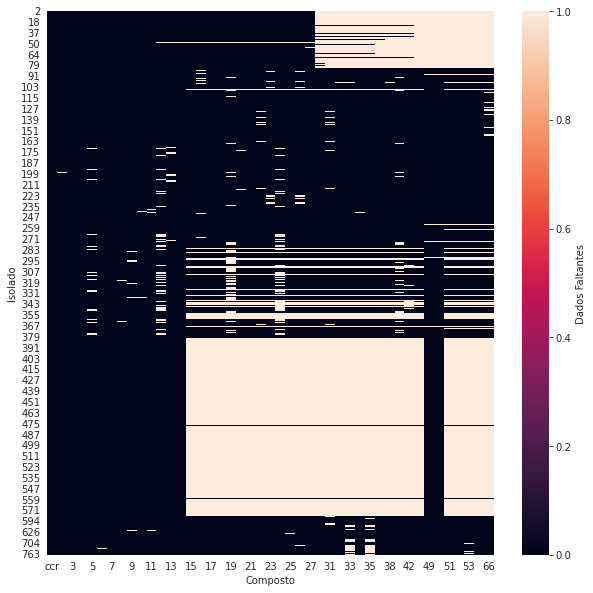

In [61]:
# mostra valores faltantes dentro de uma amostra dos dados:
# salva grafico na raiz do diretório
fig, ax = plt.subplots(figsize=(10,10))  
mapa_calor = sns.heatmap(df1.isnull(),
            cbar_kws={'label': 'Dados Faltantes'}, vmin=0, vmax=1)
ax.set(xlabel='Composto', ylabel='Isolado')

fig = mapa_calor.get_figure()
fig.savefig('valores_faltantes2.png', dpi=300)

plt.show()

### 4 - Como tratar essa grande qtd de valores faltantes???
1. Ignorar, tratar values faltantes com o vector de zeros do **Dummie Enconding**;
2. Remover todos e tratar registros como linhas de uma matriz *'banguela'*;
3. Converter esses valores para uma representação qualquer: fill in the missing values --converter e depois remover;
4. Usar interpolação (**Impute**): decidir, de maneira inteligente o que deverá substituir o espaço em branco --geralmente utiliza-se o valor de maior frequência/moda (para variáveis categóricas) ou a média (para variáveis numéricas);


In [ ]:
# 4.1. Ignorar valores nulos e tratar tudo com o One Hot Encoding:

from sklearn.preprocessing import LabelEncoder, OneHotEncoder


In [ ]:
data.columns


In [ ]:
data.head(3)


In [ ]:
# colunas para transformar: todas, exceto a coluna de índice (coluna zero)
# data[:-1]

data_encoded = pd.get_dummies(data, prefix=data.columns, prefix_sep=' ', dummy_na=False)

# a diferenca esta no drop_firt=True
# este parametro permite que o dataframe fique mais enxuto gerando k-1 registros no One-Hot-Encoding:
# o uso do drop_first permite que o encoding utilizado seja o verdadeiro dunny encoding (sem el o metodo faz o one hot encoding)
# data_encoded2 = pd.get_dummies(data, prefix=data.columns, prefix_sep=' ', dummy_na=False, drop_first=True)


In [ ]:
data_encoded.head(7)


In [ ]:
data_encoded.shape # não é um metodo .shape() e sim uma propriedade .shape


In [ ]:
# salva estado atual do dataframe em arquivo CSV:
data_encoded.to_csv('04 - reacoes_one-hot_encoded.csv')


In [ ]:
# gera o dataframe resultante do verdadeiro dummy_encoding:

data_encoded2 = pd.get_dummies(data, prefix=data.columns, prefix_sep=' ', dummy_na=False, drop_first=True)

# salva estado atual do dataframe em arquivo CSV:
data_encoded2.to_csv('04 - reacoes_dummy_encoded.csv')


In [ ]:
data_encoded2.head()


In [ ]:
# 4.2 - TODO: construção da Matriz 'Banguela':
# Por enquanto, basta deixar como está. A dificuldade é encontrar um algoritmo que consiga trabalhar com este tipo de entrada de dados.
# Regras de Associação aceitam bem esse tipo de tabela cheia de 'furos'.
data.sample(3)


In [63]:
# 4.3 - TODO:
df3 = pd.read_csv('data/03 - reacoes_col_removidas.csv', index_col='id',)
df3.head(3)


,ccr,2,3,4,5,6,7,8,9,10,...,41,42,44,49,50,51,52,53,65,66
id,,,,,,,,,,,,,,,,,,,,,
2,UFT.2015(L)8501,+,+,-,-,+,+,-,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,UFT.2015(L)8503,+,+,+w,+,+,-+,-,+w,+w,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,UFT.2015(L)8505,-+,+,-+,-+,-,+,-+,-,-,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [65]:
# preenche as celulas vazias com indicador '*'
df3.fillna('*', inplace=True)
df3.head(3)


,ccr,2,3,4,5,6,7,8,9,10,...,41,42,44,49,50,51,52,53,65,66
id,,,,,,,,,,,,,,,,,,,,,
2,UFT.2015(L)8501,+,+,-,-,+,+,-,-,-,...,*,*,*,*,*,*,*,*,*,*
4,UFT.2015(L)8503,+,+,+w,+,+,-+,-,+w,+w,...,*,*,*,*,*,*,*,*,*,*
6,UFT.2015(L)8505,-+,+,-+,-+,-,+,-+,-,-,...,*,*,*,*,*,*,*,*,*,*


In [66]:
# nenhum dado faltante, necessitando apenas o encode
df3.to_csv('5 - reacoes_fillna.csv')


In [ ]:
# 4.4 - TODO:



### Construção de EDA automatizados

1. Pandas Profiling
2. SweetViz
3. DataPrep
4. AutoViz

In [ ]:
from pandas_profiling import ProfileReport
import sweetviz as sv
from dataprep.eda import create_report
from autoviz.AutoViz_Class import AutoViz_Class


In [ ]:
# Relatório do Pandas Profiling

relatorio_inicial = ProfileReport(df, title="Reações - Relatorio Inicial", correlations={"cramers": {"calculate": False}})

relatorio_inicial.to_widgets()

relatorio_inicial.to_file("01 - relatorio-inicial_reacoes.html")

In [ ]:
# Relatório do Pandas Profiling, novamente:
relatorio_final = ProfileReport(data_encoded2, title="Reações - Relatorio Encoded", correlations={"cramers": {"calculate": False}})

relatorio_final.to_widgets()
